# Atividade 3

## Redes Neurais Simples
### Utilizando a biblioteca Scikit-Learn 

 Este código Python implementa uma Rede Neural Convolucional (FCNN - Feedforward Neural Network) para aproximar a função seno.
 
 Realizamos o treinamento da Rede Neural para interpolar uma função $\sin()$ no intervalo de $0$ a $2 \pi$. Criamos um conjunto de dados sintético onde a entrada é um ângulo e a saída desejada é o seu valor de $\sin()$. Isso é um problema de regressão onde o modelo terá que aprender a mapear ângulos para seus respectivos valores de $\sin()$.

In [11]:
#Importando bibliotecas importantes
import numpy as np
import matplotlib.pyplot as plt

#Importando uma classe específica chamada MLPRegressor de um submódulo chamado neural_network dentro da biblioteca scikit-learn
from sklearn.neural_network import MLPRegressor

### Para a criação dos dados de treinamento temos:

- `np.random.seed()`: Inicializa um gerador de números aleatórios, que nesse caso será 42. Isso significa que sempre que o código for executado a sequência aleatória será a mesma.

- `num.samples`: Número de exemplos de treinamento que serão criados para treinar a Rede Neural.

- `angles_train`: Gera os valores de entrada para o treinamento da Rede Neural.

    - `np.random.uniform(0, 4*np.pi, num_samples)`: Usa-se a função `uniform` do módulo `random` do NumPy para gerar `num_samples` (que é 100) números aleatórios que são **uniformemente distribuídos** entre $0$ e $4 \pi$. 
    
        Em radianos, $4 \pi$ representa duas voltas completas no círculo unitário. Esses números provavelmente representam os **ângulos** para os quais queremos prever o valor do seno.

    - `.reshape(-1,1)`: É usado para reformatar o array resultante. O $-1$ indica que o NumPy deve inferir o número de linhas com base no tamanho do array original, e o $1$ especifica que queremos uma única coluna.

        O resultado é um array com 100 linhas e 1 coluna, onde cada elemento é um ângulo gerado aleatoriamente. Essa formatação é frequentemente necessária em bibliotecas de aprendizado de máquina, como o scikit-learn, que esperam que os dados de entrada tenham essa estrutura (cada amostra em uma linha e cada característica em uma coluna).

    - `sin_values_train = np.sin(angles_train)`: Calcula o $\sin()$ de cada um dos ângulos armazenados no array `angles_train` usando a função `np.sin()` do NumPy. 
    
        O resultado é armazenado na variável `sin_values_train`. Este array terá a mesma forma de `angles_train` (100 linhas e 1 coluna) e conterá os valores do $\sin()$ correspondentes a cada ângulo. Esses serão provavelmente os valores alvo (as saídas desejadas) para o nosso modelo de regressão.


In [12]:
#Criação dos dados de treinamento 
np.random.seed(42) 
num_samples = 100
angles_train = np.random.uniform(0, 4 * np.pi, num_samples).reshape(-1, 1) 
sin_values_train = np.sin(angles_train)

### Agora vamos adicionar um pouco de ruído aos dados de treinamento que acabamos de gerar para tornar os dados de treinamento mais realistas e robustos:

- `noise = np.random.normal(0, 0.1, sin_values_train.shape)`: Gera-se um array de ruído usando a função `np.random.normal()`.

    - 0: Este é o primeiro argumento e representa a média (loc) da distribuição normal (gaussiana) da qual os números aleatórios serão amostrados. Uma média de 0 significa que o ruído será centrado em torno de zero.

    - 0.1: Este é o segundo argumento e representa o desvio padrão (scale) da distribuição normal. Um desvio padrão de $0.1$ define a "largura" da distribuição do ruído. Valores menores indicam que o ruído estará mais concentrado perto de zero (menos intensidade), enquanto valores maiores resultariam em ruído mais disperso (maior intensidade).

    - `sin_values_train.shape`: Este é o terceiro argumento e especifica a forma (shape) do array de ruído que será gerado. Ao usar a mesma forma de `sin_values_train`, garantimos que teremos um valor de ruído correspondente a cada valor de $\sin()$ em nosso conjunto de treinamento.

    - `sin_values_train += noise`: Esta linha realiza uma adição elemento a elemento entre o array `sin_values_train` (que contém os valores do $\sin()$ "limpos") e o array noise que acabamos de gerar. O operador `+=` significa que o resultado da adição é armazenado de volta na variável `sin_values_train`, modificando-a diretamente.

-----

OBS: `ravel()`: É um método do NumPy que "achata" um array em um array 1D. Por exemplo, se você tem um array [[1], [2], [3]] (shape (3, 1)), usar `.ravel()` nele resultaria em [1, 2, 3] (shape (3,)). 

 O `MLPRegressor` (e muitos outros modelos do scikit-learn para tarefas de regressão e classificação de saída única) prefere que os dados *y* (os rótulos ou valores alvo) sejam um array 1D, no formato (`num_samples,`)

In [13]:
#Adicionando ruído aos dados
noise = np.random.normal(0, 0.1, sin_values_train.shape)
sin_values_train += noise

#Ao adicionar sin_values_train = sin_values_train.ravel(), você estará fornecendo os dados no formato que o scikit-learn espera para y

sin_values_train = sin_values_train.ravel()

### Agora devemos definir o treinamento do modelo FCNN:

- `model = MLPRegressor(...)`:  Está criando um objeto chamado `model` que é uma rede neural real, com as configurações específicas que serão definidas.

   - `hidden_layer_sizes=(10, 10, 10)`: Define a arquitetura da rede neural. Neste caso, são três camadas ocultas, cada uma com 10 neurônios. A escolha de três camadas ocultas com 10 neurônios cada é uma tentativa de dar ao modelo capacidade suficiente para aprender a complexidade da função seno.

   - `activation='tanh'`: Especifica a função de ativação para as camadas ocultas. A função `tanh` (tangente hiperbólica) é uma função de ativação comum que mapeia as entradas para um intervalo entre -1 e 1, o que pode ser útil para funções como o seno que também variam nesse intervalo.

   - `solver='adam'`: Define o algoritmo de otimização usado para atualizar os pesos da rede durante o treinamento. `'adam'` (Adaptive Moment Estimation) é um otimizador popular e geralmente eficaz.

   - `max_iter=100000`: Define o número máximo de iterações (épocas) de treinamento. Um valor alto é escolhido para garantir que o modelo tenha tempo suficiente para convergir.

   - `random_state=42`: Define a semente para o gerador de números aleatórios interno do `MLPRegressor` para inicialização de pesos e divisões de dados, garantindo a reprodutibilidade do treinamento.

   - `learning_rate_init = 0.001`: Define a taxa de aprendizado inicial. É um hiperparâmetro crucial que controla o tamanho do passo que o otimizador dá ao ajustar os pesos.

   - `tol = 1e-8`: Define a tolerância para a otimização. Se a perda não melhorar em pelo menos `tol` para `n_iter_no_change` iterações consecutivas, o treinamento é interrompido.
        - `n_iter_no_change` é um parâmetro que controla uma condição de parada antecipada (early stopping) durante o treinamento da rede neural. Ele representa o número de iterações consecutivas em que a perda (loss function) do modelo deve não melhorar em uma quantidade mínima (tol) para que o treinamento seja interrompido.



In [14]:
#Definindo e treinando o modelo FCNN

#Define o modelo
model = MLPRegressor(
    hidden_layer_sizes=(10,10,10),  #3 camadas, com 10 neurônios cada
    activation='tanh',              #Função de ativação
    solver='adam',                  #Algoritmo de otimização
    max_iter=100000,                #Máximo de iterações
    random_state=42,                #Reprodutibilidade
    learning_rate_init = 0.001,     #Taxa de aprendizado
    tol = 1e-8                      #Tolerância 
)


### Uma vez que o modelo de treinamento foi definido, agora devemos treinar esse modelo:

- `model.fit()`: É responsável por ajustar os parâmetros internos do modelo (pesos e bias) para que o modelo possa fazer previsões precisas com base nos dados de entrada fornecidos.

   - `angles_train`: São as características de entrada (features), também conhecidas como variáveis independentes ou "X". Para essa rede neural, estes são os ângulos (os inputs que o modelo vai usar para prever). O `MLPRegressor` espera que `angles_train` seja um array 2D (`num_samples`, `num_features`).

   - `sin_values_train `: São os rótulos de saída (labels), também conhecidos como variáveis dependentes ou "y". Para essa rede neural, estes são os valores de seno correspondentes aos ângulos (o que o modelo tenta aprender a prever).


Antes de começar o treinamento, os pesos (weights) e os vieses (biases) de todas as conexões e neurônios da rede neural são inicializados. Geralmente, isso é feito com valores aleatórios pequenos (controlados pelo `random_state` no `MLPRegressor` para reprodutibilidade). Esta inicialização é crucial porque uma má inicialização pode levar a problemas no treinamento.

### Processo de treinamento:

- O `fit()` executa um ciclo repetitivo que visa minimizar a função de perda (erro) do modelo. Para cada iteração (também chamada de época ou epoch, dependendo do contexto e do otimizador)

- Os dados de `angles_train` são alimentados na camada de entrada da rede neural. Esses dados viajam através das camadas ocultas (multiplicados por pesos, somados a bias e passados por funções de ativação, como a `tanh`). Finalmente, a rede produz uma previsão de saída (`sin_values_predicted` internamente para os dados de treinamento).

- A função de perda é calculada comparando as previsões da rede com os `sin_values_train` reais. Esta "perda" quantifica o quão "errado" o modelo está.

- O erro calculado na etapa anterior é propagado de volta através da rede, da camada de saída para a camada de entrada. Durante essa propagação reversa, os gradientes da função de perda em relação a cada peso e bias são calculados. Os gradientes indicam a direção e a magnitude do "ajuste" que cada peso e bias precisam para reduzir a perda.

- O otimizador escolhido (`adam`) usa esses gradientes para atualizar os pesos e bias da rede. A `learning_rate_init` (taxa de aprendizado) controla o tamanho do passo dado nessas atualizações. Uma taxa de aprendizado alta pode fazer o modelo "pular" o mínimo da função de perda, enquanto uma taxa muito baixa pode levar a um treinamento muito lento. O objetivo é mover os pesos e bias na direção que diminua a perda, aproximando as previsões do modelo dos valores reais.

- O ciclo de treinamento continua até que um dos seguintes critérios seja atendido:

   - O número máximo de iterações (`max_iter`) é atingido.
   - A condição de parada antecipada (`n_iter_no_change` e `tol`) é satisfeita, ou seja, a perda não melhora significativamente por um certo número de iterações consecutivas.

In [15]:
# Treinando o modelo 
model.fit(angles_train, sin_values_train)

MLPRegressor(activation='tanh', hidden_layer_sizes=(10, 10, 10),
             max_iter=100000, random_state=42, tol=1e-08)

### Geração de dados para realizar os testes:

- `num_test_samples()`: Define o número de amostras de dados de teste a serem geradas.

- `angles_test = np.linspace(0, 6 * np.pi, num_test_samples).reshape(-1, 1)`:

   - `np.linspace(0, 6 * np.pi, num_test_samples)`: Gera `num_test_samples` pontos igualmente espaçados entre $0$ e $6 \pi$. Estes são os ângulos para os quais o modelo fará previsões e serão usados para avaliar o desempenho em dados não vistos. É importante notar que ele se estende além do intervalo de treinamento ($4 \pi$) para verificar a capacidade de generalização e interpolação.

- `.reshape(-1, 1)`: Remodela o array para o formato 2D exigido.

- `sin_values_true = np.sin(angles_test)`: Calcula os valores de seno verdadeiros para os ângulos de teste, que serão usados para comparar com as previsões do modelo.

In [16]:
#Geração de dados para treinamento
num_test_samples = 50
angles_test = np.linspace(0, 6 * np.pi, num_test_samples).reshape(-1, 1)
sin_values_true = np.sin(angles_test)

#Ao adicionar sin_values_true = sin_values_true.ravel(), você estará fornecendo os dados no formato que o scikit-learn espera para y

sin_values_true = sin_values_true.ravel()

### Realização das previsões: 

- `sin_values_predicted = model.predict(angles_test)`: Usa o modelo treinado para fazer previsões nos novos ângulos de teste (`angles_test`).

- `model.predict()`: Recebe um conjunto de dados de entrada. Neste caso, `angles_test` é um array de novos ângulos para os quais o modelo nunca viu os valores de seno correspondentes. É crucial que a forma (shape) desses dados de entrada seja a mesma que o modelo foi treinado para esperar. Isso significa um array 2D onde cada linha é uma amostra e a coluna representa a característica do ângulo.

- O modelo pega cada ângulo em `angles_test` e o alimenta através da rede neural, da camada de entrada até a camada de saída.

A diferença fundamental entre `predict()` e `fit()` é que, durante `predict()`, o modelo não aprende e não ajusta seus pesos e bias. Ele apenas usa os parâmetros que já foram aprendidos durante a fase de `fit()`. Ele usa o conhecimento adquirido, mas não aprende coisas novas em si.

In [17]:
#Previsões
sin_values_predicted = model.predict(angles_test)

### Avaliação do modelo:

- `from sklearn.metrics import mean_squared_error`: Importa a função `mean_squared_error` para calcular o erro quadrático médio.

- `mse = mean_squared_error(sin_values_true, sin_values_predicted)`: Calcula o Erro Quadrático Médio (MSE) entre os valores de seno verdadeiros (`sin_values_true`) e os valores previstos pelo modelo (`sin_values_predicted`). O MSE é uma métrica comum para regressão que mede a média dos quadrados dos erros. Um valor menor indica um melhor ajuste.

- `print(f"Mean Squared Error on Test Data: {mse}")`: Imprime o valor do MSE no console.

In [18]:
#Avaliação do modelo
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(sin_values_true, sin_values_predicted)
print(f"Mean Squared Error on Test Data: {mse}")

Mean Squared Error on Test Data: 0.6503189617484832


### Visualizando os resultados:

- `plt.figure(figsize=(10, 6))`: Cria uma nova figura para o gráfico com um tamanho específico (10 polegadas de largura por 6 polegadas de altura).

- `plt.scatter(angles_train, sin_values_train, label='Training Data', alpha=0.5)`: Plota os pontos de dados de treinamento como um gráfico de dispersão. `alpha=0.5` torna os pontos semi-transparentes, o que é útil quando há muitos pontos sobrepostos.

- `plt.plot(angles_test, sin_values_true, label='True sin(theta)', color='blue')`: Plota a curva de seno verdadeira sobre o intervalo de teste em azul.

- `plt.plot(angles_test, sin_values_predicted, label='Predicted sin(theta)', color='red')`: Plota a curva de seno prevista pelo modelo em vermelho.

- `plt.xlabel('Angle (radians)')`: Define o rótulo do eixo x.

- `plt.ylabel('sin(theta)')`: Define o rótulo do eixo y.

- `plt.title('FCNN Interpolation of sin(theta)')`: Define o título do gráfico.

- `plt.legend()`: Exibe a legenda do gráfico, que associa os rótulos definidos `(label='...')` às respectivas linhas/pontos.

- `plt.grid(True)`: Adiciona uma grade ao gráfico para facilitar a leitura.

- `plt.show()`: Exibe o gráfico.

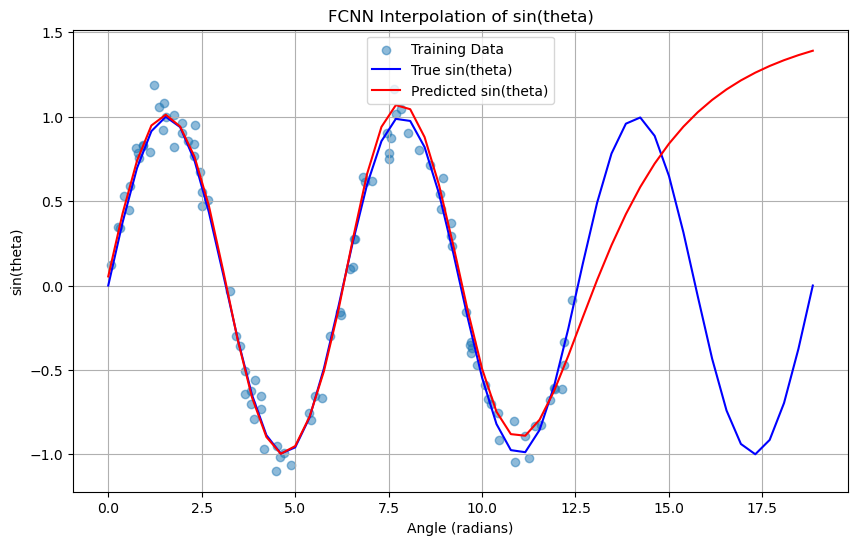

In [19]:
#Visualizando os resultados
plt.figure(figsize=(10, 6))
plt.scatter(angles_train, sin_values_train, label='Training Data', alpha=0.5)
plt.plot(angles_test, sin_values_true, label='True sin(theta)', color='blue')
plt.plot(angles_test, sin_values_predicted, label='Predicted sin(theta)', color='red')
plt.xlabel('Angle (radians)')
plt.ylabel('sin(theta)')
plt.title('FCNN Interpolation of sin(theta)')
plt.legend()
plt.grid(True)
plt.show()